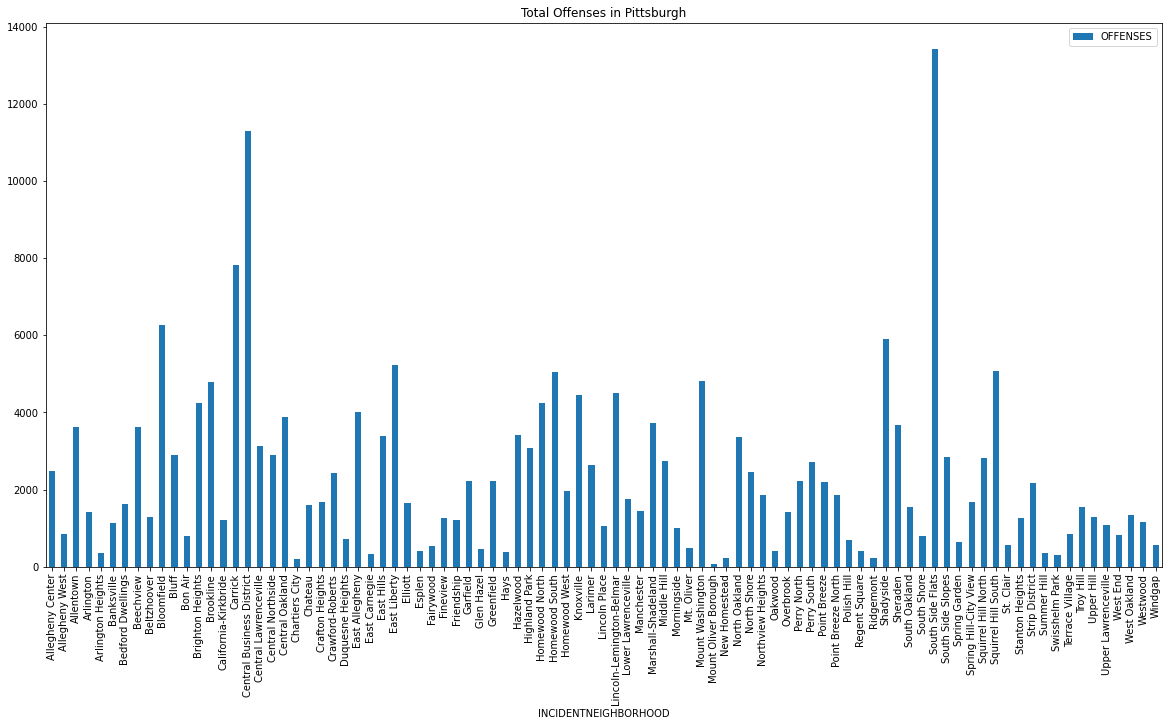

In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# load data into dataframes

# for criminal offenses
blotter_data = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e")
# for neighborhood population totals
population_data = pd.read_csv("neighborhood_population.csv")

hood_data = blotter_data.groupby('INCIDENTNEIGHBORHOOD').count()

# Dropping irrelevant data columns
hood_data = hood_data.drop(columns=["PK","CCR","HIERARCHY","INCIDENTTIME","INCIDENTLOCATION","CLEAREDFLAG","INCIDENTHIERARCHYDESC","INCIDENTZONE","INCIDENTTRACT","COUNCIL_DISTRICT","PUBLIC_WORKS_DIVISION","X","Y"])

# Combining similar data rows
hood_data.loc["Central Northside", "OFFENSES"] = hood_data.loc["Central North Side", "OFFENSES"] + hood_data.loc["Central Northside", "OFFENSES"]
hood_data.loc["Mount Oliver", "OFFENSES"] = hood_data.loc["Mt. Oliver Neighborhood", "OFFENSES"] + hood_data.loc["Mount Oliver", "OFFENSES"]
hood_data.loc["Troy Hill", "OFFENSES"] = hood_data.loc["Troy Hill-Herrs Island", "OFFENSES"] + hood_data.loc["Troy Hill", "OFFENSES"]

# renaming neighborhoods so they are consistant across dataframes
hood_data = hood_data.rename(index={"Mount Oliver": "Mt. Oliver", "Mt. Oliver Boro": "Mount Oliver Borough"})

# dropping repeated or irrelevant neighborhoods
hood_data = hood_data.drop(["Central North Side", "Golden Triangle/Civic Arena", "Mt. Oliver Neighborhood","Outside City", "Outside County", "Outside State", "Troy Hill-Herrs Island"])

# plotting total number of offenses in Pittsburgh
hood_data.plot(kind = "bar", title = "Total Offenses in Pittsburgh", figsize = (20,10),)


### Per Capita Crime Rate
This is a good representation of the total crime committed in Pittsburgh, but it can be misleading if we do not account for the population of the individual neighborhoods. I will calculate the per capita crime rate for each neighborhood and multiply by 1000 to get the amount of crime committed per 1000 people. This will give us some perspective for this data.

In [75]:
# creating a series of neighborhood population data
hood_pop = population_data.loc[:,"Estimate; Total"]

# making a list to store 
per_capita_list = []

# while loop that calculates per capita value for each neighborhoos and stores it in a list
i = 0
while i < hood_data.size:
    per_capita_value = (hood_data.iloc[i,0] / hood_pop.iloc[i]) * 1000
    per_capita_list.append(per_capita_value)
    
    i = i + 1
    
per_capita_series = pd.Series(per_capita_list)

# creating a series of neighborhood names
hood = population_data.loc[:, "Neighborhood"]

# combining the neighborhood and per capita series
per_capita_data = pd.concat([hood,per_capita_series], axis=1)

per_capita_data = per_capita_data.rename(columns={ 0 : "Crimes per 1000"})

# sorting by crimes per 1000 people
per_capita_data = per_capita_data.sort_values("Crimes per 1000")

per_capita_data.head(10)

,Neighborhood,Crimes per 1000
54,Mt. Oliver,117.056856
52,Mount Oliver Borough,140.923801
82,Swisshelm Park,217.100372
55,New Homestead,221.993834
76,Squirrel Hill North,248.764996
79,Stanton Heights,266.960723
24,Duquesne Heights,283.108644
36,Greenfield,289.076723
5,Banksville,294.453084
81,Summer Hill,297.229219


### Conclusion:
According to this data set, the neighborhood with the least amount of crime per person is Mount Oliver. I came to this conclusion by first organising the crime data by neighborhood and counting the total number of crimes reported. Next, I used a seperate population dataset to calculate the per capita crime rate per 1000 people. Finally, I combined the datasets and sorted by crimes per 1000 people. This lead me to the conclusion that the neighborhoods above have the least amount of crime per person.